In [25]:
from statistics import variance

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Housing.csv")

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [27]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [28]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [29]:
df.duplicated().sum()

np.int64(0)

In [30]:
df.replace({'yes': 1, 'no': 0}, inplace=True)
df = df.astype({'mainroad': int, 'guestroom': int, 'basement': int,
                'hotwaterheating': int, 'airconditioning': int,
                'prefarea': int})

C:\Users\it\AppData\Local\Temp\ipykernel_13056\51498860.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'yes': 1, 'no': 0}, inplace=True)


In [31]:
## Hot Encoding

df = pd.get_dummies(df, columns = ['furnishingstatus'], drop_first = True)

In [32]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False


In [33]:
df['furnishingstatus_semi-furnished'] = df['furnishingstatus_semi-furnished'].replace({'yes': 1, 'no': 0}).astype(int)
df['furnishingstatus_unfurnished'] = df['furnishingstatus_unfurnished'].replace({'yes': 1, 'no': 0}).astype(int)

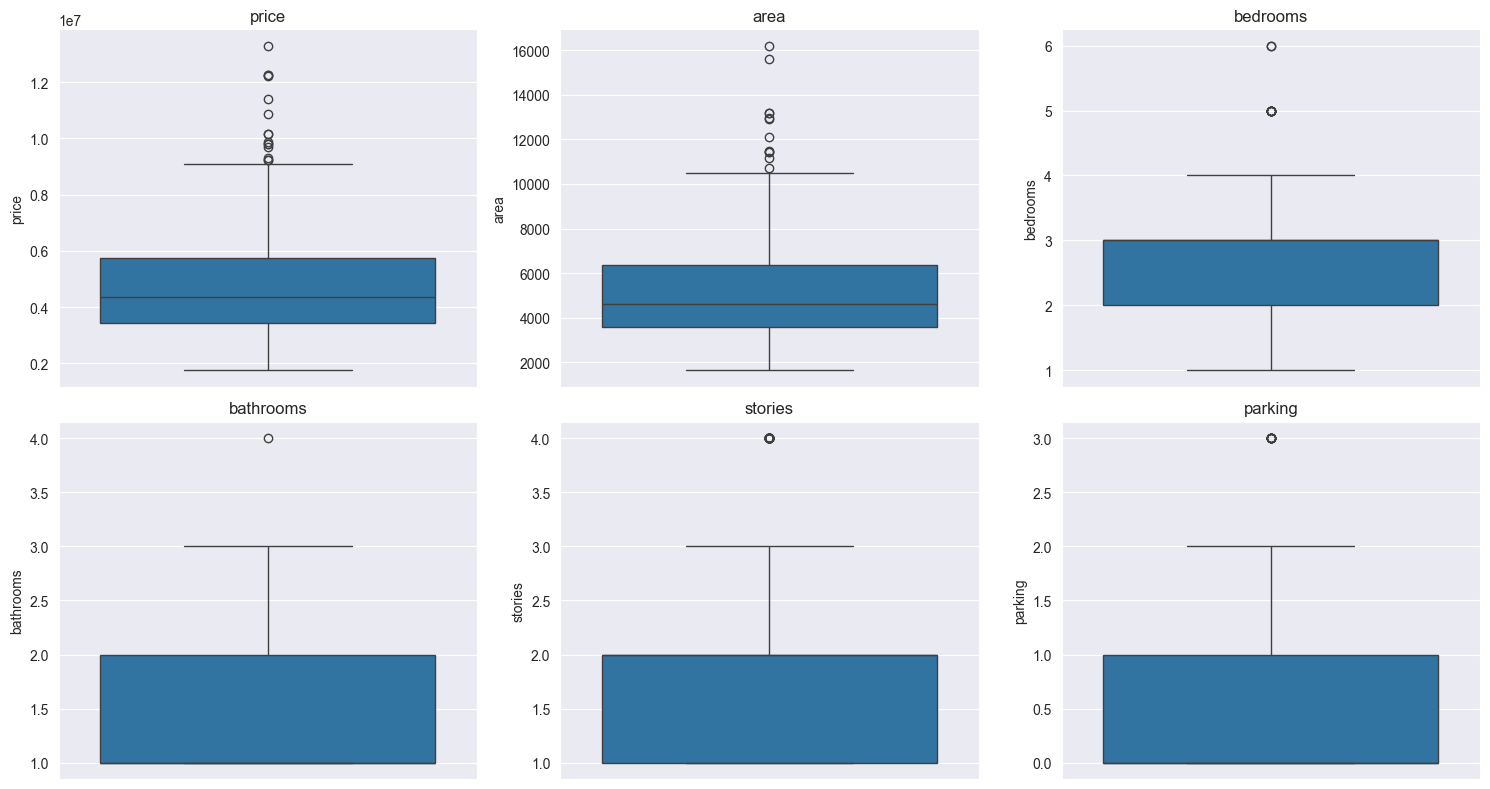

In [34]:
numeric_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

plt.figure(figsize=(15, 8))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

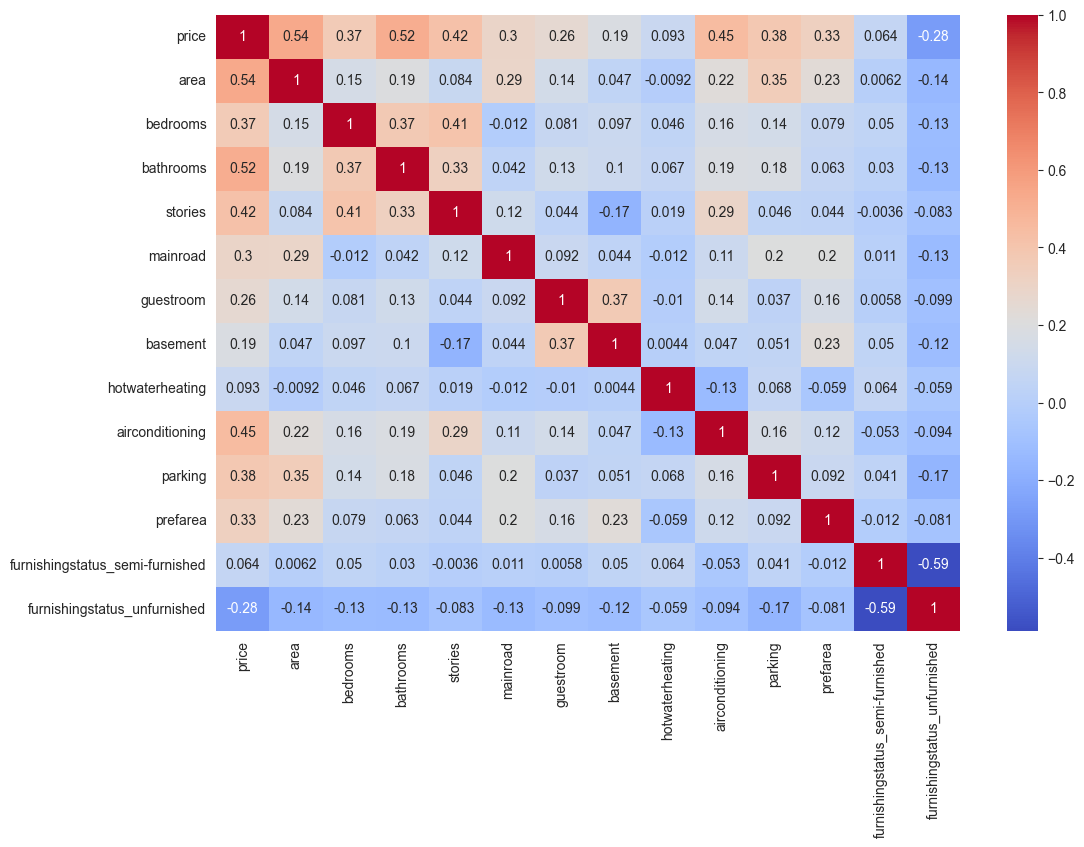

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


In [36]:
df['log_price'] = np.log(df['price'])
df['log_area'] = np.log(df['area'])
df['bedroom_bathroom_ratio'] = df['bedrooms'] / (df['bathrooms'] + 1e-6)
df['total_amenities'] = (df['mainroad'] + df['guestroom'] + df['basement'] +
                        df['hotwaterheating'] + df['airconditioning'] + df['prefarea'])


In [37]:
correlation_matrix = df.corr()
print(correlation_matrix['price'])

price                              1.000000
area                               0.535997
bedrooms                           0.366494
bathrooms                          0.517545
stories                            0.420712
mainroad                           0.296898
guestroom                          0.255517
basement                           0.187057
hotwaterheating                    0.093073
airconditioning                    0.452954
parking                            0.384394
prefarea                           0.329777
furnishingstatus_semi-furnished    0.063656
furnishingstatus_unfurnished      -0.280587
log_price                          0.969010
log_area                           0.561231
bedroom_bathroom_ratio            -0.180731
total_amenities                    0.552954
Name: price, dtype: float64


In [38]:
df.drop(['price','area'],axis=1,inplace=True)

In [39]:
df.head()

,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,log_price,log_area,bedroom_bathroom_ratio,total_amenities
0,4,2,3,1,0,0,0,1,2,1,0,0,16.403275,8.911934,1.999999,3
1,4,4,4,1,0,0,0,1,3,0,0,0,16.321036,9.100526,1.000000,2
2,3,2,2,1,0,1,0,0,2,1,1,0,16.321036,9.206332,1.499999,3
3,4,2,2,1,0,1,0,1,3,1,0,0,16.318175,8.922658,1.999999,4
4,4,1,2,1,1,1,0,1,2,0,0,0,16.250001,8.911934,3.999996,4


In [40]:
df.describe()

,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,log_price,log_area,bedroom_bathroom_ratio,total_amenities
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,0.416514,0.326606,15.306987,8.466537,2.500304,1.983486
std,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.493434,0.469402,0.372165,0.398283,0.795879,1.195004
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.375126,7.408531,0.999999,0.000000
25%,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.048071,8.188689,1.999998,1.000000
50%,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.283385,8.433812,2.499999,2.000000
75%,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,15.562970,8.757784,2.999997,3.000000
max,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,16.403275,9.692767,5.999994,5.000000


In [41]:
Q1_price = df['log_price'].quantile(0.25)
Q3_price = df['log_price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
lower_bound = Q1_price - 1.5 * IQR_price
upper_bound = Q3_price + 1.5 * IQR_price

df_clean = df[(df['log_price'] >= lower_bound) & (df['log_price'] <= upper_bound)]

Q1_area = df_clean['log_area'].quantile(0.10)
Q3_area = df_clean['log_area'].quantile(0.90)
df_clean = df_clean[(df_clean['log_area'] >= Q1_area) & (df_clean['log_area'] <= Q3_area)]

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score

X = df_clean.drop('log_price', axis=1)
y = df_clean['log_price']

features = ['log_area', 'bedrooms', 'bathrooms', 'stories', 'parking',
             'mainroad', 'prefarea', 'total_amenities',
           'bedroom_bathroom_ratio',
           'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_final = X_train[features]
X_test_final = X_test[features]

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_final)
X_test_scaled = scaler.transform(X_test_final)


df.head()

,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,log_price,log_area,bedroom_bathroom_ratio,total_amenities
0,4,2,3,1,0,0,0,1,2,1,0,0,16.403275,8.911934,1.999999,3
1,4,4,4,1,0,0,0,1,3,0,0,0,16.321036,9.100526,1.000000,2
2,3,2,2,1,0,1,0,0,2,1,1,0,16.321036,9.206332,1.499999,3
3,4,2,2,1,0,1,0,1,3,1,0,0,16.318175,8.922658,1.999999,4
4,4,1,2,1,1,1,0,1,2,0,0,0,16.250001,8.911934,3.999996,4


In [43]:
# LINEAR REGRESSION MODEL
model = LinearRegression()
model.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [44]:
y_pred = model.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


RMSE: 0.2084
R² Score: 0.7353


In [45]:
# new_house = pd.DataFrame({
#     'area': [2000],
#     'bedrooms': [3],
#     'bathrooms': [2],
#     'stories': [2],
#     'mainroad' : [1],
#     'guestroom': [0],
#     'basement': [0],
#     'hotwaterheating': [0],
#     'airconditioning': [1],
#     'parking': [1],
#     'prefarea': [1],
#     'furnishingstatus_semi-furnished': [0],
#     'furnishingstatus_unfurnished': [0]
# })

In [46]:
# new_house[num_features] = scaler.transform(new_house[num_features])
#
# predicted_price = model.predict(new_house)
# print(f"Predicted Price for New House: {predicted_price[0]}")

In [47]:
y_test_original = np.exp(y_test)
y_pred_original = np.exp(y_pred)

In [49]:
one_row = X_test[features].iloc[[1]]
one_row_scaled = scaler.transform(one_row)
pred_sample = model.predict(one_row_scaled)[0]

pred_price = np.exp(pred_sample)
actual_price = np.exp(y_test.iloc[1])

print(f"Predicted: ${pred_price:,.0f}")
print(f"Actual: ${actual_price:,.0f}")

Predicted: $4,866,739
Actual: $6,230,000


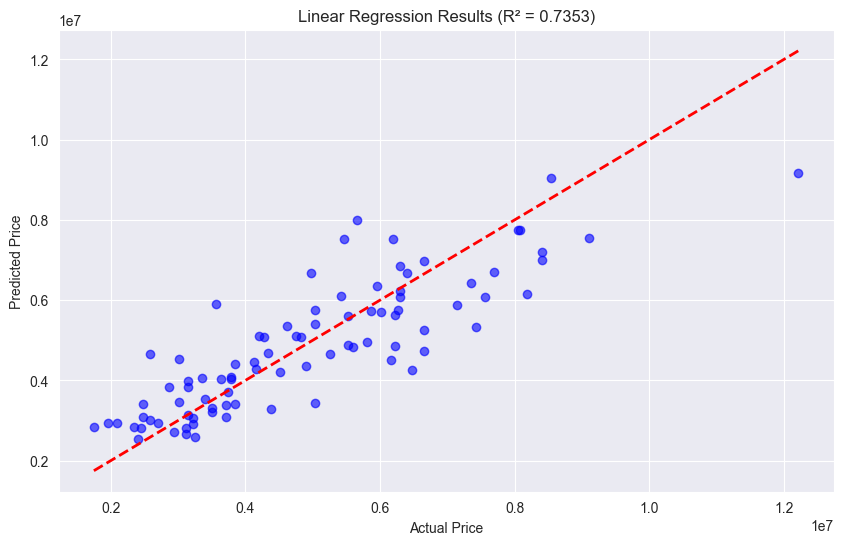

In [50]:
plt.figure(figsize=(10, 6))
y_test_original = np.exp(y_test)
y_pred_original = np.exp(y_pred)

plt.scatter(y_test_original, y_pred_original, alpha=0.6, color='blue')
plt.plot([y_test_original.min(), y_test_original.max()],
         [y_test_original.min(), y_test_original.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title(f'Linear Regression Results (R² = {r2:.4f})')
plt.show()

In [51]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, random_state=42)

sgd_reg.fit(X_train_scaled, y_train)

y_pred = sgd_reg.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R2 Score:", r2)

MSE: 0.04493595931215204
R2 Score: 0.7261851153053329


In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# استخدم أسماء الأعمدة من الداتا نفسها
feature_names = X_train_final.columns.tolist()

# احسب VIF على الداتا الـ scaled (أو بدّل للسطر اللي بعده لو عايز unscaled)
X_for_vif = pd.DataFrame(X_train_scaled, columns=feature_names)
# البديل (بدون scaling):
# X_for_vif = X_train_final.copy()

# إضافة ثابت (Intercept) — هنشيله من الجدول بعد الحساب
X_vif_const = sm.add_constant(X_for_vif, has_constant='add')

vif_df = pd.DataFrame({
    "Feature": X_vif_const.columns,
    "VIF": [
        variance_inflation_factor(X_vif_const.values, i)
        for i in range(X_vif_const.shape[1])
    ]
})

# شِل صف الثابت لأنه مش مهم لتفسير الـ VIF
vif_df = vif_df[vif_df["Feature"] != "const"].reset_index(drop=True)
print(vif_df)

                            Feature        VIF
0                          log_area   1.295810
1                          bedrooms  13.703150
2                         bathrooms  16.414972
3                           stories   1.285454
4                           parking   1.113572
5                          mainroad   1.258697
6                          prefarea   1.551837
7                   total_amenities   1.995917
8            bedroom_bathroom_ratio  20.318023
9   furnishingstatus_semi-furnished   1.663012
10     furnishingstatus_unfurnished   1.763808
